## Natural Language Processing (NLP) using NLTK (Natural Language Toolkit)

In this notebook, we will explore the NLP, which focuses on the interaction between computers and human language. NLP allows computers to understand, interpret, and generate human language in a meaningful way, opening up a wide range of possibilities for language-based applications.

NLTK is a powerful Python library for working with human language data. It provides a suite of tools and methods for various NLP tasks, such as tokenization, part-of-speech tagging, syntactic analysis and more.

Throughout this notebook, we will delve into different aspects of NLP using NLTK, learning how to preprocess text data, analyze linguistic patterns, and extract meaningful insights from text.

## Table of content

1. [Import libraries](#1-import-libraries)
2. [Read & preprocess dataset](#2-read-preprocess-datset)
3. [Word cloud](#3-word-cloud)
4. [Sentiment Analysis](#4-sentiment-analysis)
### Preprocess text

## Import libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import re

# word cloud
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from PIL import Image

# sentiment analysis
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

## Read & preprocess dataset

In [7]:
# Dataset containing the reviews of each listing.
rev = pd.read_csv('../insideairbnb/reviews.csv.gz')

In [8]:
rev.shape

(1064458, 6)

In [9]:
# Drop nan values
rev = rev.dropna()
rev.isnull().sum()

listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
dtype: int64

In [10]:
# We need to reduce the dataset so we can load it to the cloud
rev = rev.head(10000)

In [11]:
rev.shape

(10000, 6)

## Word cloud

In [12]:
# Save all comments in a list
text = []
for comment in rev['comments']:
    text.append(comment)

In [13]:
# We create a function that separates each word using space delimiter
def split_palabra(texto): 
    palabra=str(texto).split() 
    return palabra
palabras = split_palabra(text)

In [14]:
# Create the mask to make the word cloud into an image.
mask = np.array(Image.open("../images/kk.jpg")) #create the mask from the image of a house
mask[mask == 1] = 255 # white pixels (with a value of 255) could define the areas where words will be displayed, while black pixels (with a value of 0) could define the areas where no words will be displayed.

# Download stopwords: To filter out irrelevant words (articles, prepositions).
nltk.download('stopwords')

# Get stopwords in English and Spanish
stop_words_es = set(stopwords.words("spanish"))
stop_words_en = set(stopwords.words("english"))

# Join stopwords from both languages
stop_words = stop_words_es.union(stop_words_en)

# Create word cloud
palabras_final = ' '.join(palabras).lower().replace(',',' ').replace(':','')
palabras_final = re.sub(r'\b\w{1,2}\b', '', palabras_final)  # Remove 1 or 2 character words, because I was getting some single r's and b's.
nube = WordCloud(width=800, height=400, background_color='white',stopwords=stop_words,mask=mask).generate(palabras_final)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marct\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


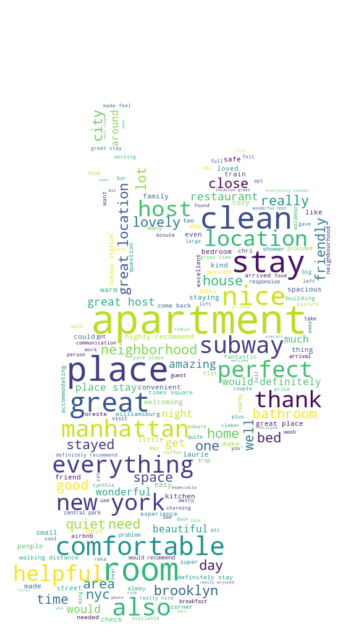

In [15]:
# Show word cloud
plt.figure(figsize=(10, 8))
plt.imshow(nube, interpolation='bilinear') # Interpolates the pixel values in the image to create a smoother, more continuous appearance.
plt.axis('off')
plt.show()

In [16]:
# Save the image
nube.to_file("../images/nube_airbnb.png")

## Sentiment Analysis

To perform sentiment analysis using NLTK in Python, the text data must first be preprocessed using techniques such as tokenization, stop word removal, and stemming or lemmatization. Once the text has been preprocessed, we will then pass it to the Vader sentiment analyzer for analyzing the sentiment of the text (positive or negative).

- **Tokenization** is a text preprocessing step in sentiment analysis that involves breaking down the text into individual words or tokens. 
- **Stemming** involves removing the suffixes from words, such as "ing" or "ed," to reduce them to their base form.
- **Lemmatization** involves reducing words to their base form based on their part of speech. 

*Source: https://www.datacamp.com/tutorial/text-analytics-beginners-nltk*

In [32]:
# Download nltk corpus (first time only)
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\marct\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\marct\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\marct\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\marct\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\marct\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping grammars\bas

In [19]:
# Import the nltk library to help us with any sentiment analysis or text analysis
import nltk
nltk.download(["names","stopwords","state_union","twitter_samples","movie_reviews","averaged_perceptron_tagger","vader_lexicon","punkt","shakespeare"])

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\marct\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marct\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to
[nltk_data]     C:\Users\marct\AppData\Roaming\nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\marct\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\marct\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\marct\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up

True

### Preprocess text

Let’s create a function preprocess_text in which we first tokenize the documents using word_tokenize function from NLTK, then we remove step words using stepwords module from NLTK and finally, we lemmatize the filtered_tokens using WordNetLemmatizer from NLTK.

*Source: https://www.datacamp.com/tutorial/text-analytics-beginners-nltk*

In [20]:
rev.head(1)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2539,55688172,2015-12-04,25160947,Peter,Great host


In [ ]:
# Create preprocess_text function
def preprocess_text(text):

    # Tokenize the text

    tokens = word_tokenize(text.lower())

    # Remove stop words

    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

    # Lemmatize the tokens

    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join the tokens back into a string

    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

# Apply the function to the dataset
rev['comments'] = rev['comments'].apply(preprocess_text)
rev.head()

In [32]:
# Make a copy of the df
rev2 = rev.copy()

### NLTK Sentiment Analyzer

In [22]:
# Initialize NLTK sentiment analyzer

analyzer = SentimentIntensityAnalyzer()


# Create get_sentiment function

def get_sentiment(text):
    """
    This function takes a text string as its input. The function calls the polarity_scores method of the analyzer object
    to obtain a dictionary of sentiment scores for the text, which includes a score for positive, negative, and neutral sentiment. 
    """
    scores = analyzer.polarity_scores(text)

    return scores

# Apply get_sentiment function

rev['scores'] = rev['comments'].apply(get_sentiment) # apply the get_sentiment function to the reviewText column of the df DataFrame using the apply method, creating a new column

rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,scores
0,2539,55688172,2015-12-04,25160947,Peter,Great host,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp..."
1,2539,97474898,2016-08-27,91513326,Liz,Nice room for the price. Great neighborhood. J...,"{'neg': 0.0, 'neu': 0.601, 'pos': 0.399, 'comp..."
2,2539,105340344,2016-10-01,90022459,Евгений,Very nice apt. New remodeled.,"{'neg': 0.0, 'neu': 0.564, 'pos': 0.436, 'comp..."
3,2539,133131670,2017-02-20,116165195,George,Great place to stay for a while. John is a gre...,"{'neg': 0.0, 'neu': 0.619, 'pos': 0.381, 'comp..."
4,2539,138349776,2017-03-19,118432644,Carlos,.,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound..."


In [24]:
rev['scores'][0]

{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'compound': 0.6249}

In [25]:
# Extract neg, pos and neutral sentiments in different columns

def extract_sentiment(row):
    scores = row['scores']
    return scores['pos'], scores['neu'], scores['neg'], scores['compound']

# Apply the function to each row
rev[['pos', 'neu', 'neg','compound']] = rev.apply(extract_sentiment, axis=1, result_type='expand')

# Now df will have new columns 'pos', 'neu', 'neg' and 'compound' with sentiment scores

In [33]:
# Obtain the count of unique values for each category
positive_count = rev['pos'].sum()
neutral_count = rev['neu'].sum()
negative_count = rev['neg'].sum()

# Data
categories = ['Positive', 'Neutral', 'Negative']
counts = [positive_count, neutral_count, negative_count]
colors = ['#68D862', '#4A90E2', '#E65854']

# go Bar
trace = go.Bar(
    x=categories,
    y=counts,
    marker=dict(color=colors)
)

# Layout
layout = go.Layout(
    title='Sentiment Distribution of reviews', title_x=0.5,
    xaxis=dict(title='Sentiment'),
    yaxis=dict(title='Count')
)

# Figure
fig = go.Figure(data=[trace], layout=layout)

# Show
fig.show()

In [34]:
# Save html fig
fig.write_html('../images/sentimentanalysis.html')

The "compound" score in the result of VADER (Valence Aware Dictionary and sEntiment Reasoner)'s polarity_scores represents the overall polarity of a text. Unlike the "positive", "negative", and "neutral" scores, which are normalized proportions of positive, negative, and neutral words in the text, the "compound" score is a single number ranging from -1 to 1. A value close to -1 indicates a highly negative sentiment, while a value close to 1 indicates a highly positive sentiment. A value close to 0 suggests a neutral or ambiguous sentiment.

In [28]:
fig = go.Figure(data=[go.Histogram(x=rev['compound'], nbinsx=100)])
fig.update_layout(
    title='Reviews polarity distribution',title_x=0.5,
    xaxis_title='compound',
    yaxis_title='count'
)
fig.show()

In [29]:
# Save html fig
fig.write_html('../images/sentimentpolarity.html')